In [1]:
import os
import yaml
import random
from IPython.display import display, HTML, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns

import moranpycess

mario_blue = "#6485fb"
mario_red = "#d20709"
mario_purple = "#9b4682"
mario_brown = "#974a02"
mario_gold = "#f7bc31"
mario_dark_green = "#148817"
mario_light_green = "#6df930"

AUTHOR: Maciej_Bak  
AFFILIATION: University_of_Basel  
AFFILIATION: Swiss_Institute_of_Bioinformatics  
CONTACT: wsciekly.maciek@gmail.com  
CREATED: 12-08-2020  
LICENSE: MIT

# <center>Moran Pycess: usecase tests</center>

## Moran Process

Population evolve according to the Moran Process with fitness-based selection: https://en.wikipedia.org/wiki/Moran_process

### Test 1: Stag Hunt
https://en.wikipedia.org/wiki/Stag_hunt

Birth Payoff Matrix:
$
B = \begin{pmatrix}
4 & 1\\
3 & 2
\end{pmatrix}
$

Death Payoff Matrix:
$
D = \begin{pmatrix}
1 & 1\\
1 & 1
\end{pmatrix}
$ (random selection)

In [2]:
# initiate Moran Process

size_list = [700, 300]
label_list = ["stag", "hare"]

BirthPayoffMatrix = np.array([[4, 1], [3, 2]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = moranpycess.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [3]:
# simulate evolution
random.seed(0)
simulation1 = mp.simulate(generations=10000)

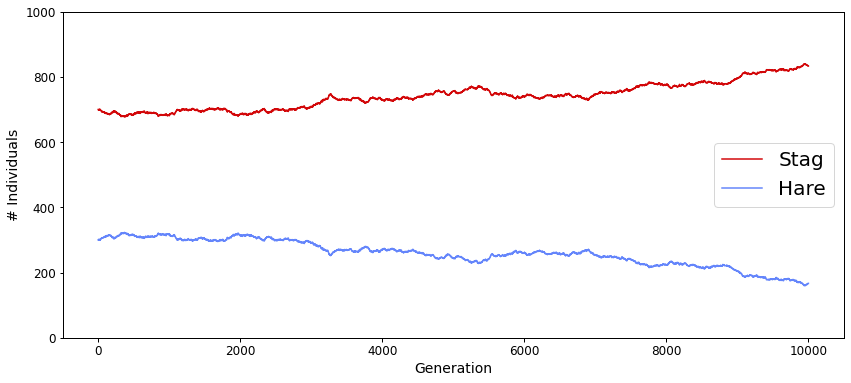

In [4]:
# plot the results
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation1['stag__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Stag")
simulation1['hare__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Hare")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

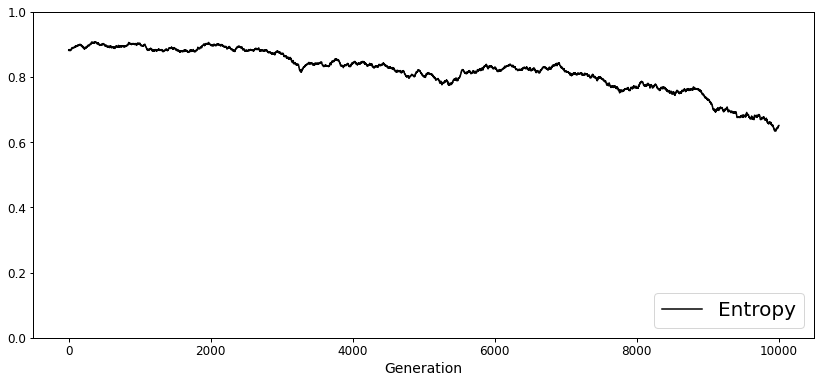

In [5]:
# plot the entropy
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation1['Entropy'].plot(color="black", linewidth=1.5, ax=ax)
ax.set_ylim([0,1])
plt.xlabel('Generation', size=14)
plt.ylabel('')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=4, fontsize=20)
plt.show()

### Test 2: Chicken
https://en.wikipedia.org/wiki/Chicken_(game)

Birth Payoff Matrix:
$
B = \begin{pmatrix}
3 & 2\\
4 & 0
\end{pmatrix}
$

Death Payoff Matrix:
$
D = \begin{pmatrix}
1 & 1\\
1 & 1
\end{pmatrix}
$ (random selection)

In [6]:
# initiate Moran Process

size_list = [10, 990]
label_list = ["swerve", "straight"]

BirthPayoffMatrix = np.array([[3, 2], [4, 0]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = moranpycess.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [7]:
# simulate evolution
random.seed(0)
simulation2 = mp.simulate(generations=30000)

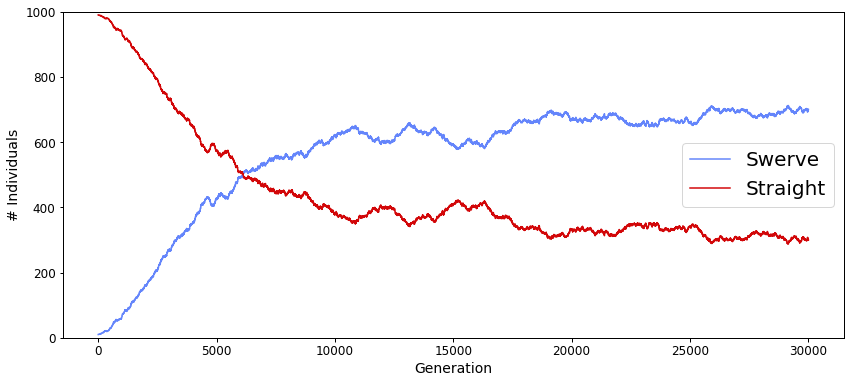

In [8]:
# plot the results
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation2['swerve__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Swerve")
simulation2['straight__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Straight")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

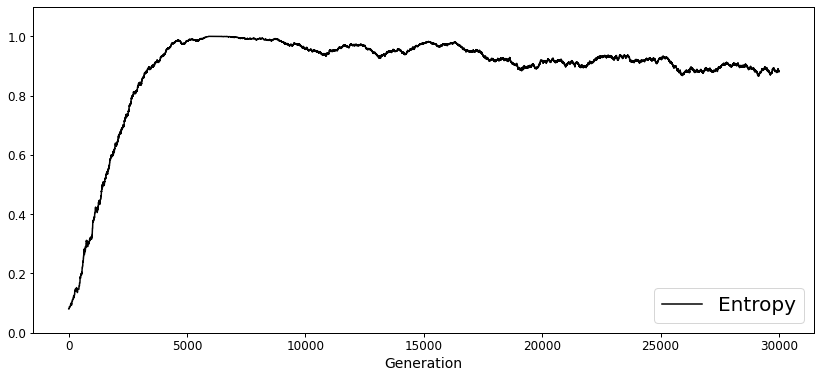

In [9]:
# plot the entropy
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation2['Entropy'].plot(color="black", linewidth=1.5, ax=ax)
ax.set_ylim([0,1.1])
plt.xlabel('Generation', size=14)
plt.ylabel('')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=4, fontsize=20)
plt.show()

### Test 3: Prisoners Dilemma
https://en.wikipedia.org/wiki/Prisoner%27s_dilemma

Birth Payoff Matrix:
$
B = \begin{pmatrix}
3 & 0\\
5 & 1
\end{pmatrix}
$

Death Payoff Matrix:
$
D = \begin{pmatrix}
1 & 1\\
1 & 1
\end{pmatrix}
$ (random selection)

In [10]:
# initiate Moran Process

size_list = [990, 10]
label_list = ["cooperate", "defect"]

BirthPayoffMatrix = np.array([[3, 0], [5, 1]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = moranpycess.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [11]:
# simulate evolution
random.seed(0)
simulation3 = mp.simulate(generations=25000)

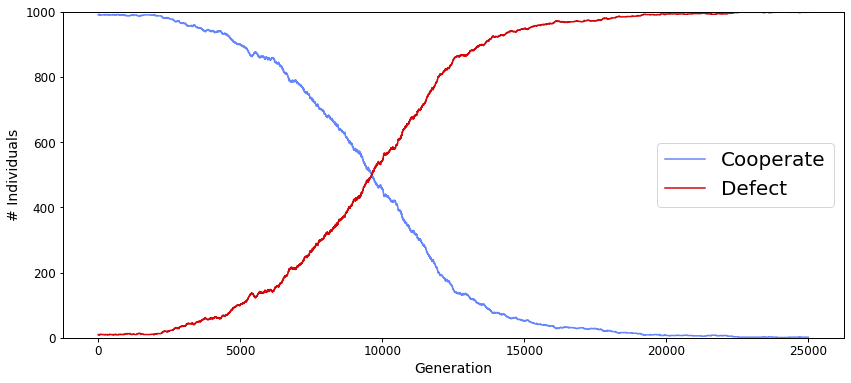

In [12]:
# plot the results
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation3['cooperate__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Cooperate")
simulation3['defect__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Defect")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

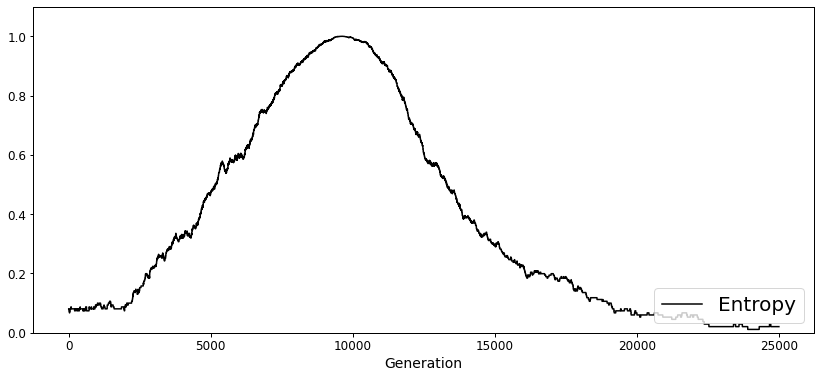

In [13]:
# plot the entropy
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation3['Entropy'].plot(color="black", linewidth=1.5, ax=ax)
ax.set_ylim([0,1.1])
plt.xlabel('Generation', size=14)
plt.ylabel('')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=4, fontsize=20)
plt.show()

### Test 4: Rock-Paper-Scissors
https://en.wikipedia.org/wiki/Rock_paper_scissors

Birth Payoff Matrix:
$
B = \begin{pmatrix}
10 & 0 & 20\\
20 & 10 & 0\\
0 & 20 & 10
\end{pmatrix}
$

Death Payoff Matrix:
$
D = \begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix}
$ (random selection)

In [14]:
# initiate Moran Process

size_list = [333, 333, 333]
label_list = ["rock", "paper", "scissors"]

BirthPayoffMatrix = np.array([[10, 0, 20], [20, 10, 0], [0, 20, 10]])
DeathPayoffMatrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

mp = moranpycess.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [15]:
# simulate evolution
random.seed(0)
simulation4 = mp.simulate(generations=30000)

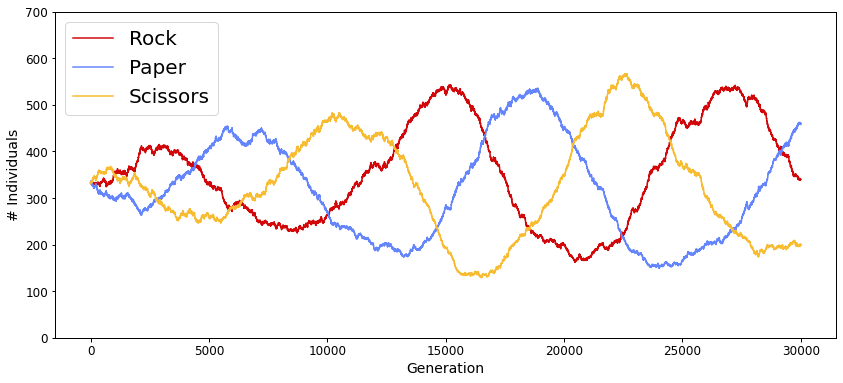

In [16]:
# plot the results
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation4['rock__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Rock")
simulation4['paper__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Paper")
simulation4['scissors__size'].plot(color=mario_gold, linewidth=1.5, ax=ax, label="Scissors")
ax.set_ylim([0,700])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=2, fontsize=20)
plt.show()

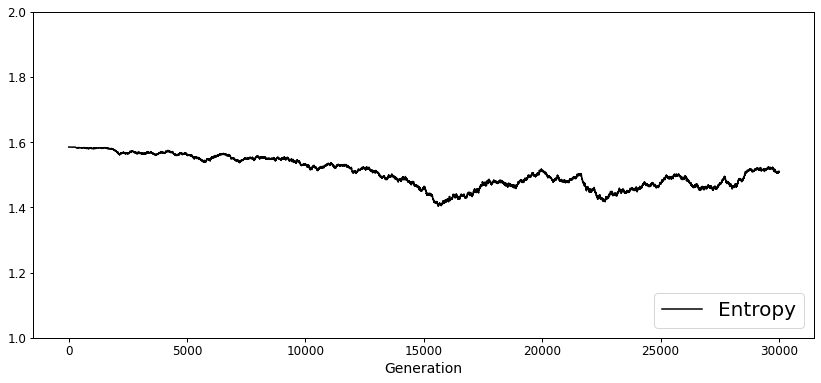

In [17]:
# plot the entropy
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation4['Entropy'].plot(color="black", linewidth=1.5, ax=ax)
ax.set_ylim([1,2])
plt.xlabel('Generation', size=14)
plt.ylabel('')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=4, fontsize=20)
plt.show()

### Publication Figure

Prepare a figure with all the simulations altogether:

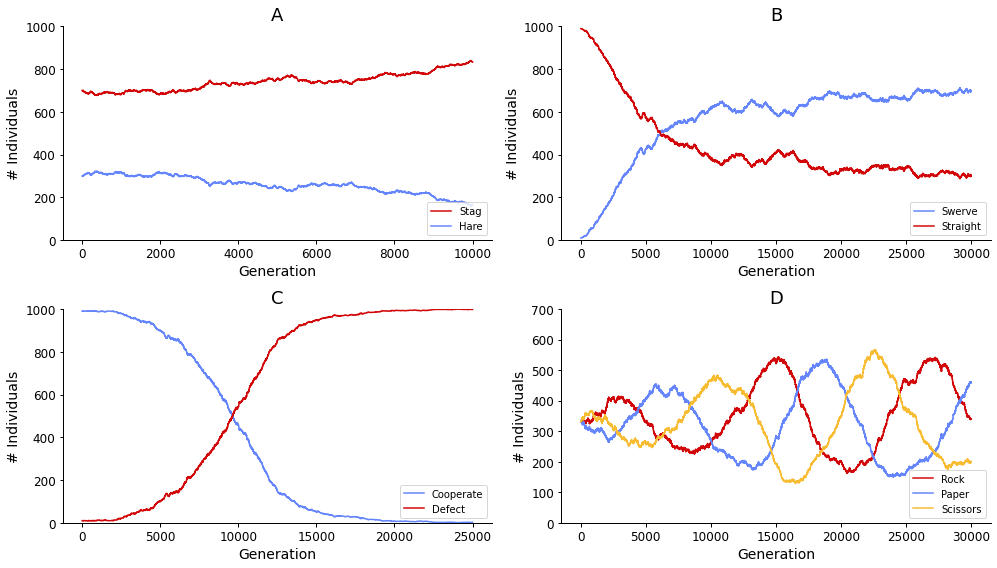

In [18]:
fig, ax =  plt.subplots(2, 2, figsize=(14,8))

plt.subplot(2, 2, 1)
ax1 = plt.gca()
ax1.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1)
simulation1['stag__size'].plot(color=mario_red, linewidth=1.5, ax=ax1, label="Stag")
simulation1['hare__size'].plot(color=mario_blue, linewidth=1.5, ax=ax1, label="Hare")
ax1.set_ylim([0,1000])
plt.title("A", size=18)
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(loc=4, fontsize=10)

plt.subplot(2, 2, 2)
ax2 = plt.gca()
ax2.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
simulation2['swerve__size'].plot(color=mario_blue, linewidth=1.5, ax=ax2, label="Swerve")
simulation2['straight__size'].plot(color=mario_red, linewidth=1.5, ax=ax2, label="Straight")
ax2.set_ylim([0,1000])
plt.title("B", size=18)
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(loc=4, fontsize=10)

plt.subplot(2, 2, 3)
ax3 = plt.gca()
ax3.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(1)
simulation3['cooperate__size'].plot(color=mario_blue, linewidth=1.5, ax=ax3, label="Cooperate")
simulation3['defect__size'].plot(color=mario_red, linewidth=1.5, ax=ax3, label="Defect")
ax3.set_ylim([0,1000])
plt.title("C", size=18)
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.legend(loc=4, fontsize=10)

plt.subplot(2, 2, 4)
ax4 = plt.gca()
ax4.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(1)
simulation4['rock__size'].plot(color=mario_red, linewidth=1.5, ax=ax4, label="Rock")
simulation4['paper__size'].plot(color=mario_blue, linewidth=1.5, ax=ax4, label="Paper")
simulation4['scissors__size'].plot(color=mario_gold, linewidth=1.5, ax=ax4, label="Scissors")
ax4.set_ylim([0,700])
plt.title("D", size=18)
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.legend(loc=4, fontsize=10)

sns.despine(ax=ax1)
sns.despine(ax=ax2)
sns.despine(ax=ax3)
sns.despine(ax=ax4)

plt.tight_layout()
plt.savefig(os.path.join("..", "images", "figure.png"), dpi=300)
plt.show()

## Moran Process 2D

Simulate Moran Process on a 2D population (Payoffs calculated based on the neighbourhood)

In [19]:
# settings for the MoranProcess2D (Prisoner's Dilemma)

size_list = [10000-9, 9]
label_list = ["A", "B"]
grid = np.full((100, 100), "A")
grid[40,40] = "B"
grid[40,41] = "B"
grid[40,42] = "B"

grid[41,40] = "B"
grid[41,41] = "B"
grid[41,42] = "B"

grid[42,40] = "B"
grid[42,41] = "B"
grid[42,42] = "B"

BirthPayoffMatrix = np.array([[5, 0], [15, 1]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

In [20]:
# initialize an instance of MoranProcess2D:

mp = moranpycess.MoranProcess2D(
    size_list=size_list,
    label_list=label_list,
    grid=grid,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

simulation2D_t0 = mp.curr_grid.copy()

In [21]:
# simulate evolution
random.seed(0)
mp.simulate(generations=50000)
simulation2D_t1 = mp.curr_grid.copy()

In [22]:
# initialize an instance of MoranProcess2D:

mp = moranpycess.MoranProcess2D(
    size_list=size_list,
    label_list=label_list,
    grid=grid,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [23]:
# simulate evolution
random.seed(0)
mp.simulate(generations=200000)
simulation2D_t2 = mp.curr_grid.copy()

In [24]:
# initialize an instance of MoranProcess2D:

mp = moranpycess.MoranProcess2D(
    size_list=size_list,
    label_list=label_list,
    grid=grid,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [25]:
# simulate evolution
random.seed(0)
mp.simulate(generations=500000)
simulation2D_t3 = mp.curr_grid.copy()

### Supplementary Figure 1a: 2D Prisoners Dilemma population snapshots

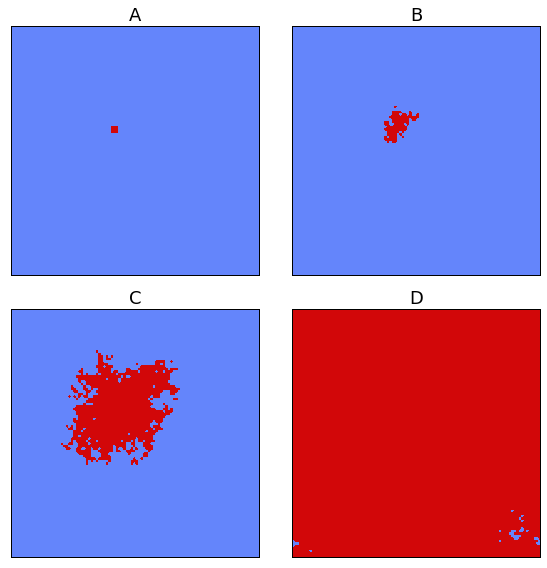

In [26]:
fig, ax =  plt.subplots(2, 2, figsize=(8,8))
cmap = colors.ListedColormap([mario_red, mario_blue])

plt.subplot(2, 2, 1)
ax1 = plt.gca()
ax1.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1)
plt.imshow((simulation2D_t0 == "A").astype(float), cmap=cmap)
plt.title("A", size=18)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([])

plt.subplot(2, 2, 2)
ax2 = plt.gca()
ax2.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
plt.imshow((simulation2D_t1 == "A").astype(float), cmap=cmap)
plt.title("B", size=18)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([])

plt.subplot(2, 2, 3)
ax3 = plt.gca()
ax3.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(1)
plt.imshow((simulation2D_t2 == "A").astype(float), cmap=cmap)
plt.title("C", size=18)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([])

plt.subplot(2, 2, 4)
ax4 = plt.gca()
ax4.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(1)
plt.imshow((simulation2D_t3 == "A").astype(float), cmap=cmap)
plt.title("D", size=18)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([])

plt.tight_layout()
plt.savefig(os.path.join("..", "images", "supplementary_figure1a.png"), dpi=300)
plt.show()

### Supplementary Figure 1b: 2D Prisoners Dilemma growth curve

In [27]:
# initialize an instance of MoranProcess2D:

mp = moranpycess.MoranProcess2D(
    size_list=size_list,
    label_list=label_list,
    grid=grid,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [28]:
# simulate evolution
random.seed(0)
simulation2D = mp.simulate(generations=600000)

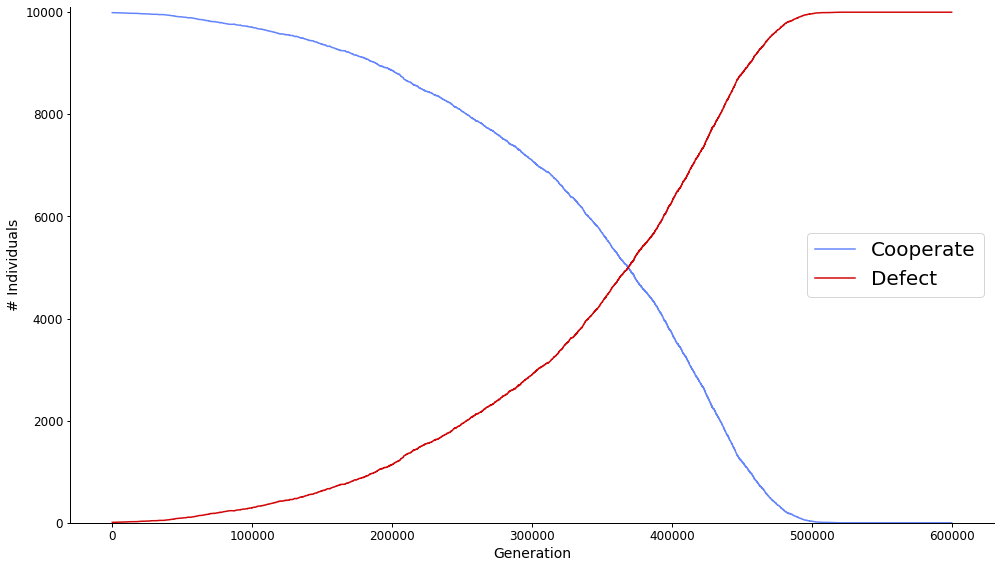

In [29]:
# plot the results
plt.figure(figsize=(14,8))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation2D['A__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Cooperate")
simulation2D['B__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Defect")
ax.set_ylim([0,10100])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
sns.despine(ax=ax)
plt.tight_layout()
plt.savefig(os.path.join("..", "images", "supplementary_figure1b.png"), dpi=300)
plt.show()

## Moran Process 3D

Simulate Moran Process on a 3D population (Payoffs calculated based on the neighbourhood)

In [30]:
# settings for the MoranProcess3D (Prisoner's Dilemma)

size_list = [8000-8, 8]
label_list = ["A", "B"]
grid = np.full((20, 20, 20), "A")
grid[9,9, 9] = "B"
grid[9,9, 10] = "B"
grid[9,10, 9] = "B"
grid[9,10, 10] = "B"
grid[10,9, 9] = "B"
grid[10,9, 10] = "B"
grid[10,10, 9] = "B"
grid[10,10, 10] = "B"

BirthPayoffMatrix = np.array([[5, 0], [15, 1]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

In [31]:
# initialize an instance of MoranProcess2D:

mp = moranpycess.MoranProcess3D(
    size_list=size_list,
    label_list=label_list,
    grid=grid,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [32]:
# simulate evolution
random.seed(0)
simulation3D = mp.simulate(generations=150000)

### Supplementary Figure 2: 3D Prisoners Dilemma growth curve

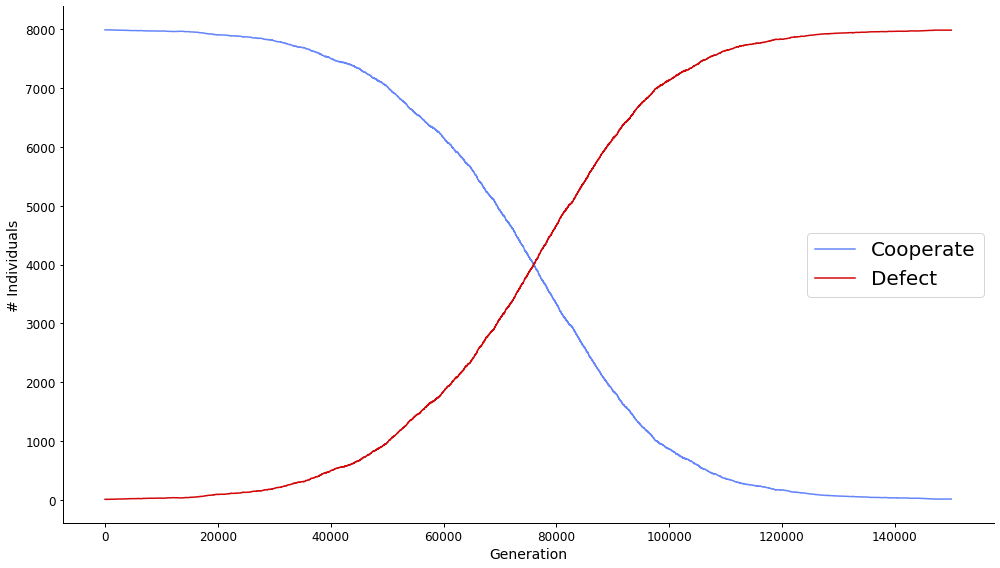

In [33]:
# plot the results
plt.figure(figsize=(14,8))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation3D['A__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Cooperate")
simulation3D['B__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Defect")
#ax.set_ylim([0,10100])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
sns.despine(ax=ax)
plt.tight_layout()
plt.savefig(os.path.join("..", "images", "supplementary_figure2.png"), dpi=300)
plt.show()

---